In [ ]:
!pip install timm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import timm
import torch
import torchvision.transforms as transforms
import io
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
model = timm.create_model("rexnet_150", pretrained = True, num_classes = len(['Healthy', 'Powdery', 'Rust']))

if torch.cuda.is_available():
    model = model.cuda()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/39.2M [00:00<?, ?B/s]

In [5]:
model.load_state_dict(torch.load("/content/gdrive/MyDrive/model_state.pt"))
model.eval()
model.cuda()

RexNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (features): Sequential(
    (0): LinearBottleneck(
      (conv_dw): ConvNormAct(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn): BatchNormAct2d(
          48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (act_dw): ReLU6()
      (conv_pwl): ConvNormAct(
        (conv): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
    )
    (1): LinearBottlene

In [6]:
def transform_image(image_bytes):
    img_tranforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = 7.3554e-07, std = 2.7703e-07)
])
    image = Image.open(io.BytesIO(image_bytes))
    return img_tranforms(image).unsqueeze(0)

In [7]:
def get_prediction(image_bytes):
    tensor = transform_image(image_bytes=image_bytes)
    if torch.cuda.is_available():
      tensor = tensor.cuda()
    output = model.forward(tensor)

    probs = torch.nn.functional.softmax(output, dim=1)
    conf, classes = torch.max(probs, 1)
    return conf.item(), img_classes[classes.item()]

Rust at confidence score:1.00


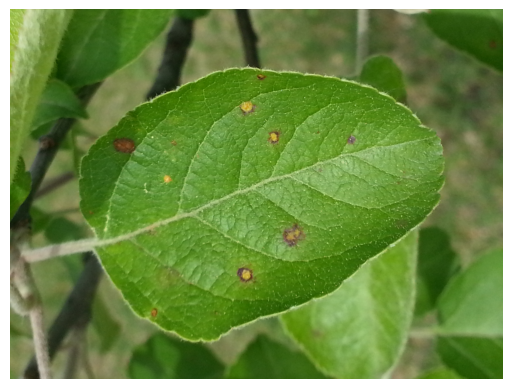

In [10]:
img_classes = {k:v for k , v in enumerate(sorted(['Healthy', 'Powdery', 'Rust']))}
image_path = "/content/gdrive/MyDrive/TEST_1.jpg"
image = plt.imread(image_path)
plt.axis('off')
plt.imshow(image)

with open(image_path, 'rb') as f:
    image_bytes = f.read()

    conf,y_pred=get_prediction(image_bytes=image_bytes)
    print(y_pred, 'at confidence score:{0:.2f}'.format(conf))

Healthy at confidence score:1.00


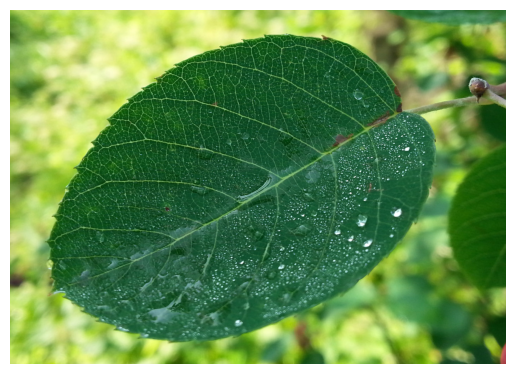

In [11]:
img_classes = {k:v for k , v in enumerate(sorted(['Healthy', 'Powdery', 'Rust']))}
image_path = "/content/gdrive/MyDrive/TEST_2.jpg"
image = plt.imread(image_path)
plt.axis('off')
plt.imshow(image)

with open(image_path, 'rb') as f:
    image_bytes = f.read()

    conf,y_pred=get_prediction(image_bytes=image_bytes)
    print(y_pred, 'at confidence score:{0:.2f}'.format(conf))

Rust at confidence score:0.73


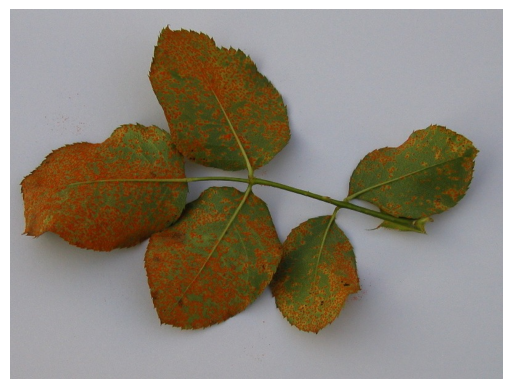

In [12]:
img_classes = {k:v for k , v in enumerate(sorted(['Healthy', 'Powdery', 'Rust']))}
image_path = "/content/gdrive/MyDrive/TEST_3.jpg"
image = plt.imread(image_path)
plt.axis('off')
plt.imshow(image)

with open(image_path, 'rb') as f:
    image_bytes = f.read()

    conf,y_pred=get_prediction(image_bytes=image_bytes)
    print(y_pred, 'at confidence score:{0:.2f}'.format(conf))